### RANDOM SELECTION

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [156]:
data=pd.read_csv('adsCTRoptimisation.csv')

In [157]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [158]:
data.shape

(10000, 10)

In [159]:
data.isnull().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

In [160]:
import random



In [161]:
my_dict = {}
for i in range(1, 11):
    my_dict[f'key{i}'] = [0]

In [162]:
my_dict

{'key1': [0],
 'key2': [0],
 'key3': [0],
 'key4': [0],
 'key5': [0],
 'key6': [0],
 'key7': [0],
 'key8': [0],
 'key9': [0],
 'key10': [0]}

In [163]:
N = 10000
d = 10 
toplam = 0
secilenler = []
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = data.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    toplam = toplam + odul
    if odul==1:
        my_dict[f'key{ad+1}'] = [value + 1 for value in my_dict[f'key{ad+1}']]
    

In [164]:
my_dict

{'key1': [172],
 'key2': [124],
 'key3': [79],
 'key4': [110],
 'key5': [302],
 'key6': [10],
 'key7': [107],
 'key8': [215],
 'key9': [89],
 'key10': [45]}

In [165]:
print('Toplam Odul:', toplam )

Toplam Odul: 1253


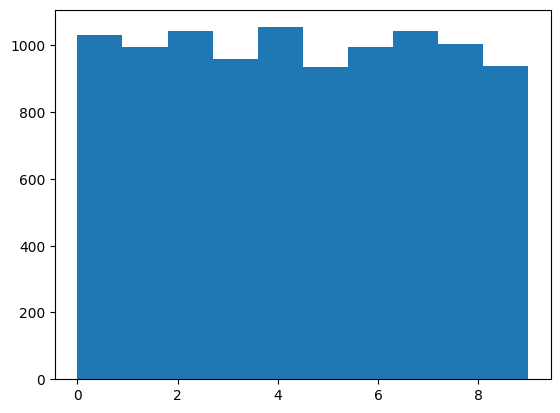

In [166]:
plt.hist(secilenler)
plt.show()


## UCB

In [167]:
N = 10000 # 10.000 tıklama
d = 10  # toplam 10 ilan var
#Ri(n)
oduller = [0] * d #ilk basta butun ilanların odulu 0
#Ni(n)
tiklamalar = [0] * d #o ana kadarki tıklamalar
toplam = 0 # toplam odul
secilenler = []
for n in range(1,N):
    ad = 0 #seçilen ilan
    max_ucb = 0
    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2* math.log(n,10)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: #max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i          
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad]+ 1
    odul = data.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    oduller[ad] = oduller[ad]+ odul
    toplam = toplam + odul
print('Toplam Odul:')   
print(toplam)


Toplam Odul:
2458


In [168]:
for i in range(10):
    print("{} adının toplam ödülü: {}".format(i,secilenler.count(i)))

0 adının toplam ödülü: 309
1 adının toplam ödülü: 246
2 adının toplam ödülü: 146
3 adının toplam ödülü: 205
4 adının toplam ödülü: 7761
5 adının toplam ödülü: 68
6 adının toplam ödülü: 219
7 adının toplam ödülü: 822
8 adının toplam ödülü: 136
9 adının toplam ödülü: 87


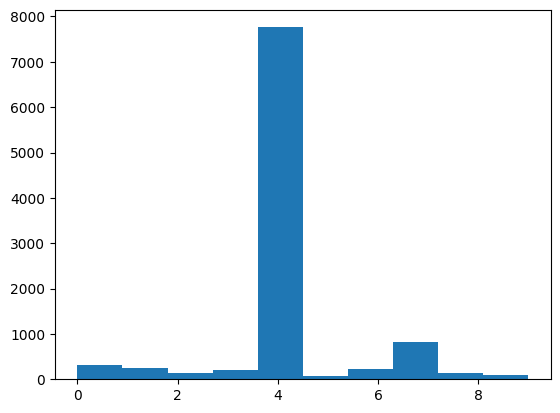

In [169]:
plt.hist(secilenler)
plt.show()